# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

/Users/rtavenar/Documents/ur2/2024-2025/deep-edhec/notebooks/venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [5]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train, x_test, y_train, y_test = prepare_boston()

In [9]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [10]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - 25ms/step - loss: 0.5481
Epoch 2/10
5/5 - 0s - 4ms/step - loss: 0.3170
Epoch 3/10
5/5 - 0s - 4ms/step - loss: 0.2118
Epoch 4/10


/Users/rtavenar/Documents/ur2/2024-2025/deep-edhec/notebooks/venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 - 0s - 4ms/step - loss: 0.1653
Epoch 5/10
5/5 - 0s - 4ms/step - loss: 0.1353
Epoch 6/10
5/5 - 0s - 4ms/step - loss: 0.1180
Epoch 7/10
5/5 - 0s - 4ms/step - loss: 0.1098
Epoch 8/10
5/5 - 0s - 4ms/step - loss: 0.1023
Epoch 9/10
5/5 - 0s - 4ms/step - loss: 0.0986
Epoch 10/10
5/5 - 0s - 4ms/step - loss: 0.0929


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [11]:
x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


/Users/rtavenar/Documents/ur2/2024-2025/deep-edhec/notebooks/venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 4s - 7ms/step - accuracy: 0.8476 - loss: 0.6179
Epoch 2/10
600/600 - 4s - 6ms/step - accuracy: 0.9054 - loss: 0.3466
Epoch 3/10
600/600 - 4s - 6ms/step - accuracy: 0.9137 - loss: 0.3098
Epoch 4/10
600/600 - 4s - 6ms/step - accuracy: 0.9184 - loss: 0.2927
Epoch 5/10
600/600 - 4s - 6ms/step - accuracy: 0.9212 - loss: 0.2819
Epoch 6/10
600/600 - 4s - 6ms/step - accuracy: 0.9230 - loss: 0.2751
Epoch 7/10
600/600 - 4s - 6ms/step - accuracy: 0.9246 - loss: 0.2695
Epoch 8/10
600/600 - 4s - 6ms/step - accuracy: 0.9255 - loss: 0.2656
Epoch 9/10
600/600 - 4s - 6ms/step - accuracy: 0.9269 - loss: 0.2622
Epoch 10/10
600/600 - 4s - 6ms/step - accuracy: 0.9276 - loss: 0.2591


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9079 - loss: 0.3329
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9567 - loss: 0.1516
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9692 - loss: 0.1071
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9768 - loss: 0.0821
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9808 - loss: 0.0663
Epoch 6/10
600/600 - 4s - 7ms/step - accuracy: 0.9840 - loss: 0.0545
Epoch 7/10
600/600 - 4s - 7ms/step - accuracy: 0.9873 - loss: 0.0447
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9893 - loss: 0.0371
Epoch 9/10
600/600 - 4s - 7ms/step - accuracy: 0.9918 - loss: 0.0310
Epoch 10/10
600/600 - 4s - 7ms/step - accuracy: 0.9934 - loss: 0.0253


In [13]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9135 - loss: 0.3019
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9658 - loss: 0.1150
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9759 - loss: 0.0796
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9809 - loss: 0.0605
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9855 - loss: 0.0470
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9876 - loss: 0.0377
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9906 - loss: 0.0292
Epoch 8/10
600/600 - 6s - 9ms/step - accuracy: 0.9914 - loss: 0.0255
Epoch 9/10
600/600 - 6s - 9ms/step - accuracy: 0.9932 - loss: 0.0213
Epoch 10/10
600/600 - 7s - 11ms/step - accuracy: 0.9944 - loss: 0.0174


In [14]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 8s - 13ms/step - accuracy: 0.9204 - loss: 0.2754
Epoch 2/10
600/600 - 8s - 14ms/step - accuracy: 0.9654 - loss: 0.1134
Epoch 3/10
600/600 - 8s - 14ms/step - accuracy: 0.9761 - loss: 0.0774
Epoch 4/10
600/600 - 8s - 14ms/step - accuracy: 0.9822 - loss: 0.0568
Epoch 5/10
600/600 - 7s - 11ms/step - accuracy: 0.9855 - loss: 0.0450
Epoch 6/10
600/600 - 8s - 13ms/step - accuracy: 0.9871 - loss: 0.0386
Epoch 7/10
600/600 - 7s - 12ms/step - accuracy: 0.9894 - loss: 0.0326
Epoch 8/10
600/600 - 7s - 12ms/step - accuracy: 0.9906 - loss: 0.0278
Epoch 9/10
600/600 - 8s - 14ms/step - accuracy: 0.9924 - loss: 0.0232
Epoch 10/10
600/600 - 8s - 13ms/step - accuracy: 0.9930 - loss: 0.0202


In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [16]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 6s - 10ms/step - accuracy: 0.9115 - loss: 0.3191
Epoch 2/10
600/600 - 6s - 10ms/step - accuracy: 0.9595 - loss: 0.1417
Epoch 3/10
600/600 - 6s - 9ms/step - accuracy: 0.9709 - loss: 0.0991
Epoch 4/10
600/600 - 7s - 12ms/step - accuracy: 0.9782 - loss: 0.0746
Epoch 5/10
600/600 - 6s - 11ms/step - accuracy: 0.9824 - loss: 0.0592
Epoch 6/10
600/600 - 7s - 11ms/step - accuracy: 0.9862 - loss: 0.0472
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9897 - loss: 0.0369
Epoch 8/10
600/600 - 6s - 11ms/step - accuracy: 0.9915 - loss: 0.0312
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9929 - loss: 0.0255
Epoch 10/10
600/600 - 5s - 9ms/step - accuracy: 0.9942 - loss: 0.0215


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [17]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 5s - 12ms/step - accuracy: 0.9008 - loss: 0.3360 - val_accuracy: 0.9533 - val_loss: 0.1592
Epoch 2/10
420/420 - 5s - 11ms/step - accuracy: 0.9595 - loss: 0.1337 - val_accuracy: 0.9594 - val_loss: 0.1362
Epoch 3/10
420/420 - 5s - 11ms/step - accuracy: 0.9727 - loss: 0.0921 - val_accuracy: 0.9668 - val_loss: 0.1142
Epoch 4/10
420/420 - 5s - 11ms/step - accuracy: 0.9785 - loss: 0.0683 - val_accuracy: 0.9682 - val_loss: 0.1088
Epoch 5/10
420/420 - 5s - 11ms/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9681 - val_loss: 0.1162
Epoch 6/10
420/420 - 5s - 11ms/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9726 - val_loss: 0.0977
Epoch 7/10
420/420 - 5s - 11ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9693 - val_loss: 0.1090
Epoch 8/10
420/420 - 5s - 11ms/step - accuracy: 0.9895 - loss: 0.0301 - val_accuracy: 0.9703 - val_loss: 0.1161
Epoch 9/10
420/420 - 5s - 11ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9723 - val_loss:

In [18]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.8958 - loss: 0.3717 - val_accuracy: 0.9382 - val_loss: 0.2145
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9514 - loss: 0.1717 - val_accuracy: 0.9539 - val_loss: 0.1610
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9652 - loss: 0.1221 - val_accuracy: 0.9619 - val_loss: 0.1293
Epoch 4/10
420/420 - 4s - 9ms/step - accuracy: 0.9731 - loss: 0.0917 - val_accuracy: 0.9659 - val_loss: 0.1164
Epoch 5/10
420/420 - 4s - 9ms/step - accuracy: 0.9806 - loss: 0.0701 - val_accuracy: 0.9687 - val_loss: 0.1068
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9840 - loss: 0.0574 - val_accuracy: 0.9706 - val_loss: 0.1027
Epoch 7/10
420/420 - 4s - 9ms/step - accuracy: 0.9871 - loss: 0.0459 - val_accuracy: 0.9693 - val_loss: 0.1044
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9902 - loss: 0.0365 - val_accuracy: 0.9714 - val_loss: 0.0975
Epoch 9/10
420/420 - 4s - 9ms/step - accuracy: 0.9930 - loss: 0.0290 - val_accuracy: 0.9733 - val_loss

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [19]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 11ms/step - accuracy: 0.8999 - loss: 0.3537 - val_accuracy: 0.9457 - val_loss: 0.1851
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9568 - loss: 0.1445 - val_accuracy: 0.9578 - val_loss: 0.1394
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9706 - loss: 0.0984 - val_accuracy: 0.9646 - val_loss: 0.1172
Epoch 4/10
420/420 - 4s - 11ms/step - accuracy: 0.9789 - loss: 0.0712 - val_accuracy: 0.9684 - val_loss: 0.1085
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9820 - loss: 0.0577 - val_accuracy: 0.9681 - val_loss: 0.1056
Epoch 6/10
420/420 - 4s - 11ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9714 - val_loss: 0.1000
Epoch 7/10
420/420 - 4s - 11ms/step - accuracy: 0.9895 - loss: 0.0346 - val_accuracy: 0.9703 - val_loss: 0.1058
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9666 - val_loss: 0.1192
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9698 - val_loss:

In [20]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 3s - 8ms/step - accuracy: 0.6533 - loss: 1.3576 - val_accuracy: 0.8336 - val_loss: 0.6938
Epoch 2/10
420/420 - 3s - 8ms/step - accuracy: 0.8550 - loss: 0.5579 - val_accuracy: 0.8784 - val_loss: 0.4479
Epoch 3/10
420/420 - 3s - 8ms/step - accuracy: 0.8836 - loss: 0.4187 - val_accuracy: 0.8904 - val_loss: 0.3767
Epoch 4/10
420/420 - 3s - 8ms/step - accuracy: 0.8980 - loss: 0.3636 - val_accuracy: 0.9021 - val_loss: 0.3399
Epoch 5/10
420/420 - 3s - 8ms/step - accuracy: 0.9061 - loss: 0.3317 - val_accuracy: 0.9086 - val_loss: 0.3167
Epoch 6/10
420/420 - 3s - 8ms/step - accuracy: 0.9119 - loss: 0.3090 - val_accuracy: 0.9118 - val_loss: 0.3001
Epoch 7/10
420/420 - 3s - 8ms/step - accuracy: 0.9166 - loss: 0.2914 - val_accuracy: 0.9153 - val_loss: 0.2887
Epoch 8/10
420/420 - 3s - 8ms/step - accuracy: 0.9210 - loss: 0.2762 - val_accuracy: 0.9201 - val_loss: 0.2749
Epoch 9/10
420/420 - 3s - 8ms/step - accuracy: 0.9245 - loss: 0.2636 - val_accuracy: 0.9216 - val_loss: 0.2650
E

In [21]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 11ms/step - accuracy: 0.9001 - loss: 0.3536 - val_accuracy: 0.9469 - val_loss: 0.1828
Epoch 2/10
420/420 - 5s - 11ms/step - accuracy: 0.9582 - loss: 0.1418 - val_accuracy: 0.9603 - val_loss: 0.1341
Epoch 3/10
420/420 - 4s - 11ms/step - accuracy: 0.9710 - loss: 0.0958 - val_accuracy: 0.9667 - val_loss: 0.1101
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.9692 - val_loss: 0.1031
Epoch 5/10
420/420 - 4s - 11ms/step - accuracy: 0.9833 - loss: 0.0542 - val_accuracy: 0.9716 - val_loss: 0.1001
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9704 - val_loss: 0.1063
Epoch 7/10
420/420 - 4s - 11ms/step - accuracy: 0.9906 - loss: 0.0317 - val_accuracy: 0.9709 - val_loss: 0.1077
Epoch 8/10
420/420 - 4s - 11ms/step - accuracy: 0.9918 - loss: 0.0263 - val_accuracy: 0.9701 - val_loss: 0.1080
Epoch 9/10
420/420 - 5s - 11ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9737 - val_loss:

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [22]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 5s - 11ms/step - accuracy: 0.7574 - loss: 0.9906 - val_accuracy: 0.8955 - val_loss: 0.4138
Epoch 2/10
420/420 - 4s - 11ms/step - accuracy: 0.9044 - loss: 0.3523 - val_accuracy: 0.9196 - val_loss: 0.2973
Epoch 3/10
420/420 - 4s - 11ms/step - accuracy: 0.9220 - loss: 0.2763 - val_accuracy: 0.9287 - val_loss: 0.2545
Epoch 4/10
420/420 - 4s - 11ms/step - accuracy: 0.9327 - loss: 0.2381 - val_accuracy: 0.9355 - val_loss: 0.2277
Epoch 5/10
420/420 - 4s - 11ms/step - accuracy: 0.9407 - loss: 0.2107 - val_accuracy: 0.9391 - val_loss: 0.2115
Epoch 6/10
420/420 - 4s - 11ms/step - accuracy: 0.9463 - loss: 0.1896 - val_accuracy: 0.9466 - val_loss: 0.1924
Epoch 7/10
420/420 - 4s - 11ms/step - accuracy: 0.9504 - loss: 0.1732 - val_accuracy: 0.9497 - val_loss: 0.1813
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9547 - loss: 0.1585 - val_accuracy: 0.9510 - val_loss: 0.1712
Epoch 9/10
420/420 - 4s - 11ms/step - accuracy: 0.9584 - loss: 0.1460 - val_accuracy: 0.9526 - val_loss:

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [23]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 11ms/step - accuracy: 0.9011 - loss: 0.3524 - val_accuracy: 0.9475 - val_loss: 0.1841
Epoch 2/10
420/420 - 5s - 11ms/step - accuracy: 0.9584 - loss: 0.1389 - val_accuracy: 0.9620 - val_loss: 0.1305
Epoch 3/10
420/420 - 4s - 11ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.9623 - val_loss: 0.1246
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9780 - loss: 0.0710 - val_accuracy: 0.9692 - val_loss: 0.1051
Epoch 5/10
420/420 - 4s - 11ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9673 - val_loss: 0.1077
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9875 - loss: 0.0415 - val_accuracy: 0.9689 - val_loss: 0.1108
Epoch 7/10
420/420 - 4s - 11ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9706 - val_loss: 0.1072
Epoch 8/10
420/420 - 5s - 11ms/step - accuracy: 0.9929 - loss: 0.0249 - val_accuracy: 0.9699 - val_loss: 0.1127
Epoch 9/10
420/420 - 4s - 11ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9699 - val_loss:

In [24]:
h.history

{'accuracy': [0.9011428356170654,
  0.9584285616874695,
  0.972000002861023,
  0.9779999852180481,
  0.9831904768943787,
  0.9875476360321045,
  0.9897381067276001,
  0.9928571581840515,
  0.9931190609931946,
  0.9950000047683716],
 'loss': [0.3524123728275299,
  0.1389348804950714,
  0.09421991556882858,
  0.07102286070585251,
  0.053467098623514175,
  0.04153920337557793,
  0.03361162915825844,
  0.024883227422833443,
  0.021956367418169975,
  0.01640695333480835],
 'val_accuracy': [0.9474999904632568,
  0.9620000123977661,
  0.9623333215713501,
  0.9691666960716248,
  0.9672777652740479,
  0.9688888788223267,
  0.9706110954284668,
  0.969944417476654,
  0.9698888659477234,
  0.9725555777549744],
 'val_loss': [0.18406742811203003,
  0.13048718869686127,
  0.1246470957994461,
  0.10511191934347153,
  0.10768908262252808,
  0.11080135405063629,
  0.10722391307353973,
  0.11266425997018814,
  0.11173070967197418,
  0.11084951460361481]}

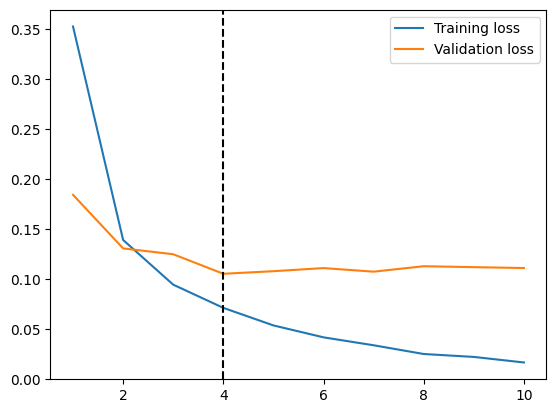

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [26]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 - 6s - 10ms/step - accuracy: 0.9181 - loss: 0.2913 - val_accuracy: 0.9604 - val_loss: 0.1396
Epoch 2/10
600/600 - 6s - 10ms/step - accuracy: 0.9650 - loss: 0.1172 - val_accuracy: 0.9672 - val_loss: 0.1083
Epoch 3/10
600/600 - 6s - 10ms/step - accuracy: 0.9757 - loss: 0.0812 - val_accuracy: 0.9709 - val_loss: 0.0918
Epoch 4/10
600/600 - 6s - 10ms/step - accuracy: 0.9808 - loss: 0.0625 - val_accuracy: 0.9754 - val_loss: 0.0836
Epoch 5/10
600/600 - 6s - 10ms/step - accuracy: 0.9854 - loss: 0.0472 - val_accuracy: 0.9742 - val_loss: 0.0854
Epoch 6/10
600/600 - 6s - 10ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.9747 - val_loss: 0.0860
Epoch 7/10
600/600 - 6s - 10ms/step - accuracy: 0.9898 - loss: 0.0306 - val_accuracy: 0.9720 - val_loss: 0.1032
Epoch 8/10
600/600 - 6s - 10ms/step - accuracy: 0.9919 - loss: 0.0240 - val_accuracy: 0.9766 - val_loss: 0.0836
Epoch 9/10
600/600 - 6s - 10ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9759 - val_loss:

Use the code below to check that a model has been saved:

In [27]:
%ls -alh "model.keras"

-rw-r--r--@ 1 rtavenar  staff   1.4M Jan 14 11:45 model.keras


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9751 - loss: 0.0942


[0.08247976750135422, 0.9779000282287598]

In [29]:
model.load_weights("model.keras")
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9751 - loss: 0.0942


[0.08247976750135422, 0.9779000282287598]

## Regularization

**Question #11.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [30]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 6s - 10ms/step - accuracy: 0.9153 - loss: 0.2984 - val_accuracy: 0.9543 - val_loss: 0.1493
Epoch 2/100
600/600 - 6s - 10ms/step - accuracy: 0.9646 - loss: 0.1204 - val_accuracy: 0.9674 - val_loss: 0.0998
Epoch 3/100
600/600 - 6s - 9ms/step - accuracy: 0.9753 - loss: 0.0833 - val_accuracy: 0.9740 - val_loss: 0.0851
Epoch 4/100
600/600 - 6s - 9ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9738 - val_loss: 0.0806
Epoch 5/100
600/600 - 6s - 10ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9773 - val_loss: 0.0769
Epoch 6/100
600/600 - 6s - 9ms/step - accuracy: 0.9878 - loss: 0.0384 - val_accuracy: 0.9769 - val_loss: 0.0742
Epoch 7/100
600/600 - 6s - 10ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9783 - val_loss: 0.0719
Epoch 8/100
600/600 - 6s - 9ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9771 - val_loss: 0.0838
Epoch 9/100
600/600 - 6s - 10ms/step - accuracy: 0.9926 - loss: 0.0224 - val_accuracy: 0.9764 - val_

In [31]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0856


[0.0718676745891571, 0.9782999753952026]